# 1장 들어가기

데이터 과학은 수 많은 데이터 속에서 필요한 답을 찾는 방법을 연구하는 과학이며,
데이터 과학자는 난잡한 데이터로부터 필요한 정보를 이끄러 내는 사람을 가리킨다.

## 핵심 인물 찾기

아래 코드에서 `id`와 `name`이 연결되어 있음을 직관적으로 알 수 있다.

In [3]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

친구관계를 아이디의 튜플을 이용하여 표현한다.

In [4]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

친구관계를 그림으로 나타내면 다음과 같다.

<table cellspacing="20">
<tr>
<td>
<img src="../images/fig0101.png">
</td>
</tr>
</table>

그림 출처: 밑바닥부터 시작하는 데이터 과학, 조엘 그루스 지음, 인사이트

#### 알아두기
* 모델링: 친구 관계를 네트워크 모델로 표현하였다.
* `list`, `tuple`, `dict` 유사점과 차이점

`friendship_pairs`에 사용된 리스트 자료형은 검색 기능이 매우 비효율적이다.
반면에 `dict` 자료형은 보다 빠른 검색 기능을 제공한다.
`dict` 자료형을 이용하여 아래처럼 친구관계를 나타낼 수 있다.
```
{ 0 : 0번의 친구들 리스트,
  1 : 1번의 친구들 리스트,
  ...
  9 : 9번의 친구들 리스트 }
```

In [5]:
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

`dict` 자료형 값(객체)를 생성하는 방법은 나중에 자세히 설명한다.
결과는 다음과 같다.

In [6]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

특정 유저의 친구 수는 다음 함수를 이용하여 구할 수 있다.

In [7]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

유저들의 친구 수를 모두 합한 결과는 다음과 같다.

In [8]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

유저들의 평균 친구 수는 다음과 같다.

In [9]:
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

#### 알아두기
* 평균: 평균값(average),  중앙값(median), 최빈값(mode)

가장 많은 사람과 친구 관계를 맺은 유저는 가장 많은 친구 수를 갖는 유저이다. 
리스트의 정렬 기법을 활용한다. 

In [10]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(                             
       key=lambda id_and_friends: id_and_friends[1],
       reverse=True)                                
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

#### 알아두기
* 리스트 정렬 옵션: `key`, `reverse`
* `lambda` 함수
* 함수?
* 유저들의 숫자가 매우 큰 경우 정렬이 아닌 다른 방법을 활용하는 것이 좋다. 
    정렬은 비용이 많이 들기 때문이다. 시간도 많이 들고 메모리도 많이 사용한다.

### 연결 중심성(degree centrality)

연결 중심성은 네트워크 모델에서 사용되는 거리 개념의 일종이며,
네트워크 모델의 중심인물 찾기에 활용된다.
연결 중심성을 기준으로 친구 관계를 표현하면 다음과 같다.

<table cellspacing="20">
<tr>
<td>
<img src="../images/fig0102.png">
</td>
</tr>
</table>

그림 출처: 밑바닥부터 시작하는 데이터 과학, 조엘 그루스 지음, 인사이트

위 그림은 id 4인 Thor가 네트워크의 중심이라는 인상을 준다. 
하지만 Thor의 친구 수는 2이며 보다 많은 친구를 가진 다른 유저가 존재한다.
22장에서 중심성의 다양한 개념을 살펴볼 것이다.

#### 알아두기
* 네트워크 모델 중심인물 찾기 기준은 다양할 수 있다.
    * 팔로워 수, 트위 수, 게시글 수, 등등
    * 여기서는 연결 중심성을 기준으로 활용하였다.
* 모델링
    * 친구 관계를 네트워크 모델로 표현하였다.
    * 또한 연결 중심성을 원의 크기를 이용하여 표현하였다.
    * 연결 중심성 이외에 다른 중심성 개념이 존재하며, 
        중심성 개념이 달라지면 모델도 달라진다. (22장 참조)
        * 매개 중심성(betweenness centrality)
        * 고유벡터 중심성(eigenvector centrality)

## 친구 추천

친구 추천 기능을 어떻게 구현할 것인가, 
즉 친구 추천을 위해 어떤 모델을 사용할 것인가를 고민한다.
예를 들어, 친구의 친구들의 목록을 다음과 같이 확인할 수 있다.

**주의:** 함수 이름에 `bad` 단어가 포함되어 있으면 추천하는 방법이 아니라는 의미이다.
이유는 곧 알게 될 것이다.

In [11]:
def foaf_ids_bad(user):
    """foaf = "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

#### 알아두기
* 리스트 조건제시법(list comprehension)

0번 아이디를 가진 Hero의 친구의 친구 리스트는 다음과 같다.

In [12]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

### 공통 친구

그런데 이와 같이 하면 0번 아이디 스스로 자신의 친구의 친구가 되며, 
3번 아이디처럼 두 친구의 친구가 동일할 수도 있다.
따라서 서로 아는 친구관계도 흥미로운 주제이다.
다만 중복된 친구관계는 제외하고 다루어야 한다.
즉, 진정으로 친구의 친구만 선택해야 한다.

In [15]:
from collections import Counter                  

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]    
        for foaf_id in friendships[friend_id]    
        if foaf_id != user_id                    
        and foaf_id not in friendships[user_id]  
    )

예를 들어, 3번 아이디 Chi의 친구들인 아이디 1, 2, 4는 
Chi와 Chi의 친구들을 제외하면 0번 아이디 또는 5번 아이디를 친구로 둔다. 
즉, 0번 아이디와 5번 아이디 각각은 3번 아이디 Chi와 서로 친구의 친구 관계, 
친구를 공유하는 관계이다.

`friends_of_friends` 함수의 본체에서 `Counter` 함수의 인자와
리스트 조건제시법을 이용하여 3번 아이디에 대해 순수한 친구의 친구들의 리스트를 구해면
다음과 같다.

In [20]:
[foaf_id for friend_id in friendships[3]    
         for foaf_id in friendships[friend_id]    
         if foaf_id != 3           
            and foaf_id not in friendships[3]]

[0, 0, 5]

위 결과에 의해 0번 아이디 Chi는 2명의 친구를 공유하고, 
5번 아이디와 Chi는 1명의 친구를 공유함을 알 수 있다.
실제로 아래 결과가 동일한 결과를 확인해준다.

In [19]:
friends_of_friends(users[3])

Counter({0: 2, 5: 1})

#### 알아두기
* `Counter` 자료형

### 공통 관심사

In [21]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

0번 아이디와 9번 아이디는 친구 관계는 아니지만 둘 모두 Java와 Big Data에 관심이 있다.

특정 분야에 관심을 갖는 유저 찾기는 꽤 쉽다.

In [22]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

예를 들어, Big Data에 관심 있는 유저들은 0번, 8번, 9번 아이디이다.

In [23]:
data_scientists_who_like('Big Data')

[0, 8, 9]

`data_scientists_who_like` 함수를 여러 번 호출하거나 
유저 데이터가 매우 클 경우, 위 작업은 매우 비효율적이 된다.
아래와 같이 유저들의 관심사를 한 번만 훑은 다음에 관련 정보를 
`dict` 자료형에 저장해 두는 것이 좋다.

In [25]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

이제 `user_ids_by_interest`에는 
`관심사:[관심 있는 아이디 리스트]` 형식으로 구성된 사전(`dict`) 
자료형이 생성된다.

예를 들어, `Big Data`에 관심을 가진 유저들의 리스트는 다음과 같다.

In [27]:
user_ids_by_interest['Big Data']

[0, 8, 9]

실제 `user_ids_by_interest`에 저장된 값은 다음과 같다.

In [26]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

유저 아이디를 키로 사용할 수도 있다.

In [29]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

예를 들어, 3번 아이디의 관심사는 다음과 같다.

In [30]:
interests_by_user_id[3]

['R', 'Python', 'statistics', 'regression', 'probability']

#### 알아두기
* `defaultdict`
    * [여기](https://docs.python.org/3/library/collections.html#collections.defaultdict) 설명 참조
* 리스트 `append` 메소드

특정 유저와 가장 많은 관심사를 공유하는 다른 유저를 찾아보자.

In [31]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

예를 들어 3번 아이디 유저와 공통 관심사를 갖는 유저들과 공통 관심사의 개수는 다음과 같다.

In [32]:
most_common_interests_with(users[3])

Counter({5: 2, 2: 1, 6: 2, 4: 1})

즉, 5번 아이디는 3번 아이디와 두 개의 공통 관심사를, 
2번 아이디는 3번 아이디와 한 개의 공통 관심사를, 
6번 아이디는 3번 아이디와 두 개의 공통 관심사를, 
4번 아이디는 3번 아이디와 한 개의 공통 관심사를 
갖는다.

지금까지 알아본 공통 친구와 공통 관심사에 대한 분석을 바탕으로 
"과학자 추천 시스템"의 성능을 향상시키는 방법을 23장에서 알아볼 것이다.

## 연봉과 경력

유저 열 명의 연봉과 데이터 과학자로서의 경력을 담은 리스트는 다음과 같다.
연봉은 개인정보이기에 유저 아이디를 삭제하고 익명으로 처리하였다.

In [40]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

경력과 연봉 사이의 관계를 산점도를 이용하여 쉽게 표현할 수 있다.
이를 위해 먼저 연봉과 경력을 따로 분리한다.

In [41]:
salaries = []
tenures = []

for sal, ten in salaries_and_tenures:
    salaries.append(sal)
    tenures.append(ten)

주피터 노트북 내에서 그래프를 보여주려면 아래 명령어를 실행해야 한다.

**주의:** 아래 명령어는 파이썬 명령어가 아니다.

In [46]:
%matplotlib inline

`tenures`의 원소를 x-좌표값, `salaries`의 원소를 y-좌표값으로 사용하여
산점도를 아래와 같이 그린다.

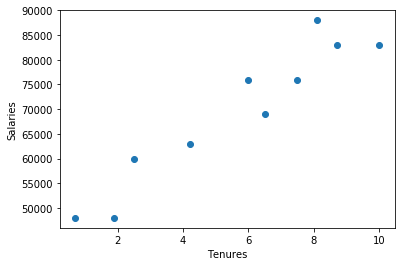

In [47]:
from matplotlib import pyplot as plt

plt.scatter(tenures, salaries)
plt.xlabel("Tenures")
plt.ylabel("Salaries")
plt.show()

#### 알아두기
* 산점도
* `matplot`을 활용하여 그래프 그리기
    * 3장에서 좀 더 다양한 그래프 그리는 방법을 다룰 예정임.

In [ ]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}


assert average_salary_by_tenure == {
    0.7: 48000.0,
    1.9: 48000.0,
    2.5: 60000.0,
    4.2: 63000.0,
    6: 76000.0,
    6.5: 69000.0,
    7.5: 76000.0,
    8.1: 88000.0,
    8.7: 83000.0,
    10: 83000.0
}

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# Keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}


assert average_salary_by_bucket == {
    'between two and five': 61500.0,
    'less than two': 48000.0,
    'more than five': 79166.66666666667
}

def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)